# Preprocessing Data

## Repairing Missing Data

In [1]:
import pandas as pd
import numpy as np
data = pd.DataFrame([[1,2,np.nan],[np.nan,2,np.nan],
                     [3,np.nan,np.nan],[np.nan,3,8],
                     [5,3,np.nan]],columns=['A','B','C'])
print(data,'\n') # prints the data
# counts NaN values for each feature
print(data.isnull().sum(axis=0)) 

     A    B    C
0  1.0  2.0  NaN
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  3.0  8.0
4  5.0  3.0  NaN 

A    2
B    1
C    4
dtype: int64


In [2]:
# Drops definitely C from the dataset
data.drop('C', axis=1, inplace=True)
# Creates a placeholder for B's missing values
data['missing_B'] = data['B'].isnull().astype(int)
# Fills missings in B using B's average
data['B'].fillna(data['B'].mean(), inplace=True)
# Interpolates A
data['A'].interpolate(method='linear', inplace=True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.5          1
3  4.0  3.0          0
4  5.0  3.0          0


In [3]:
# We replicate data and missing value handling 
# as before but for feature B
data = pd.DataFrame([[1,2,np.nan],[np.nan,2,np.nan],
                     [3,np.nan,np.nan],[np.nan,3,8],
                     [5,3,np.nan]],columns=['A','B','C'])
data.drop('C', axis=1, inplace=True)
data['missing_B'] = data['B'].isnull().astype(int)
data['A'].interpolate(method='linear', inplace=True)
# Here we handle feature B using a mode instead of an average
data['B'].fillna(data['B'].mode().iloc[0], inplace=True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.0          1
3  4.0  3.0          0
4  5.0  3.0          0


# Creating Your Own Features

## Explaining the basics of SVD

In [4]:
import numpy as np
from scipy.linalg import svd

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

# Perform the decomposition.
U, s, VT = svd(A)
print("\nU\n", U)
print("\ns\n", s)
print("\nVT\n", VT)

# Create the m x n Sigma matrix.
#Sigma = np.zeros((A.shape[0], A.shape[1]))
#Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
Sigma = np.diag(s)
print("\nSigma matrix\n", Sigma)

# Reconstruct the original matrix.
B = U.dot(Sigma.dot(VT))
print("\nReconstructed matrix\n", B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

U
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

s
 [1.68481034e+01 1.06836951e+00 1.47280825e-16]

VT
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [ 0.40824829 -0.81649658  0.40824829]]

Sigma matrix
 [[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.47280825e-16]]

Reconstructed matrix
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## Reorganizing data

In [5]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
boston = load_boston()
X, y = boston.data, boston.target
pca = PCA().fit(X)

In [6]:
print (' '.join(['%5i'%(k+1) for k in range(13)]))
print (' '.join(['-----']*13))
print (' '.join(["%0.3f" % (variance) for variance 
            in pca.explained_variance_ratio_]))
print (' '.join(["%0.3f" % (variance) for variance 
            in np.cumsum(pca.explained_variance_ratio_)]))

    1     2     3     4     5     6     7     8     9    10    11    12    13
----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
0.806 0.163 0.021 0.007 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.806 0.969 0.990 0.997 0.998 0.999 1.000 1.000 1.000 1.000 1.000 1.000 1.000


# Delimiting Anomalous Data

## Using a univariate strategy

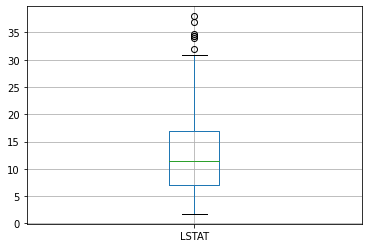

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
%matplotlib inline 
boston = load_boston()
X, y = boston.data, boston.target
X = pd.DataFrame(X, columns=boston.feature_names)
X.boxplot('LSTAT',return_type='axes')

## Resorting to Multivariate Models

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
pca.fit(scale(X))
C = pca.transform(scale(X))

Text(0, 0.5, 'Component 2')

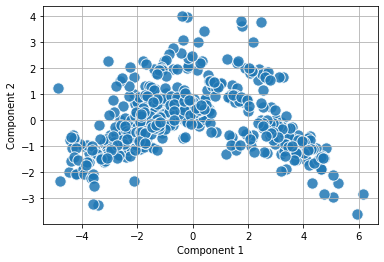

In [9]:
import matplotlib.pyplot as plt
plt.scatter(C[:,0],C[:,1], s=2**7, edgecolors='white',
            alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel('Component 1') # adds label to x axis
plt.ylabel('Component 2') # adds label to y axis

Text(0, 0.5, 'Component 13')

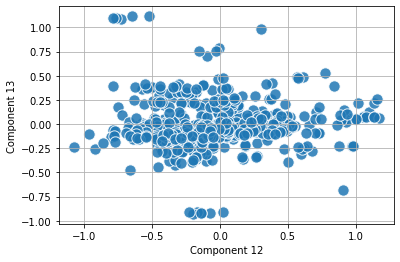

In [10]:
plt.scatter(C[:,11],C[:,12], s=2**7, edgecolors='white',
            alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel('Component 12') # adds label to x axis
plt.ylabel('Component 13') # adds label to y axis